# Bayes' rule application using Python
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In this Notebook, we will look at simple examples of Bayesian probability calculations.

### Bayes' rule (or theorem)

Bayes’ theorem (alternatively Bayes’ law or Bayes’ rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if a disease is related to age, then, using Bayes’ theorem, a person's age can be used to more accurately assess the probability that they have the disease, compared to the assessment of the probability of disease made without knowledge of the person’s age.

Bayes’ theorem is stated mathematically as the following equation:

$$ P(A\mid B)={\frac {P(B\mid A).P(A)}{P(B)}} $$

where $A$ and $B$ are events and $P(B)\neq0$.

- $P(A\mid B)$ is a conditional probability: the likelihood of event $A$ occurring given that $B$ is true.
- $P(B\mid A)$ is also a conditional probability: the likelihood of event $B$ occurring given that $A$ is true.
- $P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other; this is known as the marginal probability.

### History

Bayes’ theorem is named after Reverend Thomas Bayes, who first used conditional probability to provide an algorithm (his Proposition 9) that uses evidence to calculate limits on an unknown parameter, published as  An Essay towards solving a Problem in the Doctrine of Chances (1763). In what he called a _scholium_, Bayes extended his algorithm to any unknown prior cause. 

Independently of Bayes, Pierre-Simon Laplace in 1774, and later in his 1812 _“Théorie analytique des probabilités”_ used conditional probability to formulate the relation of an updated posterior probability from a prior probability, given evidence.

### A logical process for data science
It is a logical way of doing data science...

> _We start with a hypothesis. Then, we gather data, and update our initial belief. If the data supports the hypothesis then the probability goes up, if it does not match, then probability goes down._

But in majority of statistical learning, the notion of Prior is not used or not looked favorably.
Also, the computational intricacies of Bayesian learning has prevented it from being mainstream for more than two hundred years.

But things are changing now...

[Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference) is being applied to genetics, linguistics, image processing, brain imaging, cosmology, machine learning, epidemiology, psychology, forensic science, human object recognition, evolution, visual perception, ecology, and countless other fields where knowledge discovery and predictive analytics are playing a significant role.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## Drug screening example

![drug_screen](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/Drug-Screening.png)

Suppose that a test for using a particular drug is **97% sensitive** and **95% specific**. 

That is, the test will produce **97% true positive** results for drug users and **95% true negative results** for non-drug users.

Suppose that 0.5% of the general population are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

We will write a custom function which accepts the test capabilities and the prior knowledge of drug user percentage as input and produces the output probability of a test-taker being an user based on a positive result.

### Theory

The Bayes' rule based calculation is given by the following equation,

$$ P(\text{User}|+)=\frac{P(+|\text{User}).P(\text{User})}{P(+)}\\ = 
\frac{P(+|\text{User}).P(\text{User})}{P(+|\text{User}).P(\text{User})+P(+|\text{Non-user}).P(\text{Non-user})} $$

Here,

$P(\text{User}) = \text{Prevelance rate}$<br>
$P(\text{Non-user}) = 1-\text{Prevelance rate}$<br>
$P(+|\text{User})=\text{Sensitivity}$<br>
$P(-|\text{Non-user})=\text{Specificity}$<br>
$P(+|\text{Non-user})=1-\text{Specificity}$

### Custom function

In [2]:
def drug_user(prob_th=0.5,sensitivity=0.99,specificity=0.99,prevelance=0.01,verbose=True):
    """
    """
    p_user = prevelance
    p_non_user = 1-prevelance
    p_pos_user = sensitivity
    p_neg_user = specificity
    p_pos_non_user = 1-specificity
    
    num = p_pos_user*p_user
    den = p_pos_user*p_user+p_pos_non_user*p_non_user
    
    prob = num/den
    
    if verbose:
        if prob > prob_th:
            print("The test-taker could be an user")
        else:
            print("The test-taker may not be an user")

    return prob

### Run with the details given in the original question

In [3]:
p = drug_user(prob_th=0.5,sensitivity=0.97,specificity=0.95,prevelance=0.005)
print("Probability of the test-taker being a drug user is:",round(p,3))

The test-taker may not be an user
Probability of the test-taker being a drug user is: 0.089


### Isn't that fascinating to ponder over?

Even with a test that is 97% correct for catching positive cases, and 95% correct for rejecting negative cases, the true probability of being a drug-user with a positive result is only 8.9%!

If you look at the computations, this is because of extremely low prevelance rate. The number of false positives outweighs the number of true positives. 

For example, if 1000 individuals are tested, there are expected to be 995 non-users and 5 users. From the 995 non-users, 0.05 × 995 ≃ 50 false positives are expected. From the 5 users, 0.95 × 5 ≈ 5 true positives are expected. Out of 55 positive results, only 5 are genuine!

Let's see how the probability changes with prevelance rate.

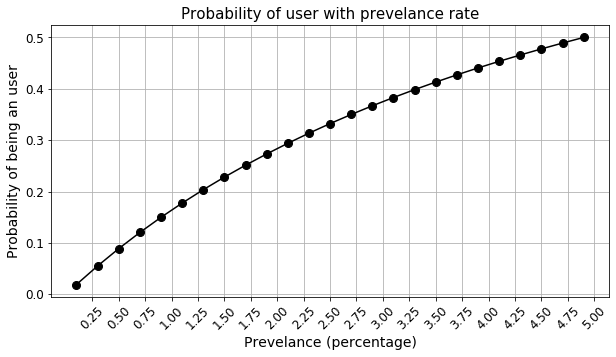

In [4]:
ps = []
pres = []
for pre in [i*0.001 for i in range(1,51,2)]:
    pres.append(pre*100)
    p = drug_user(prob_th=0.5,sensitivity=0.97,specificity=0.95,prevelance=pre,verbose=False)
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of user with prevelance rate",fontsize=15)
plt.plot(pres,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Prevelance (percentage)",fontsize=14)
plt.ylabel("Probability of being an user",fontsize=14)
plt.xticks([i*0.25 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

Note, your decision depends on the probability threshold. Currently, it is set to 0.5. You can lower it if necessary. But, at 0.5 threshold, you need to have almost 4.8% prevelance rate to catch a user with a single positive test result. 

### So, what level of test capability is needed to improve this scenario?

Test sensitivity and speficity impacts this computation strongly. So, we may like to see what kind of capabilities are needed to improve the likelihood of catching drug users.

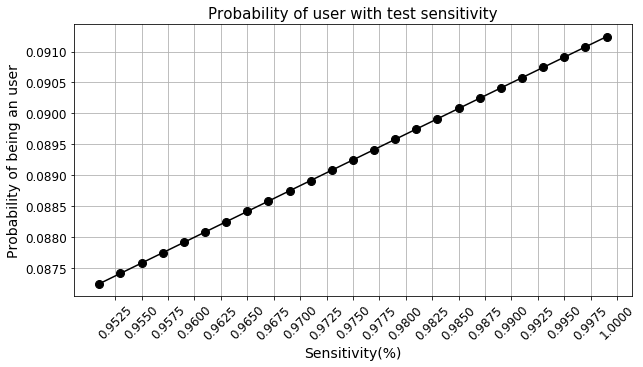

In [5]:
ps = []
sens = []
for sen in [i*0.001+0.95 for i in range(1,50,2)]:
    sens.append(sen)
    p = drug_user(prob_th=0.5,sensitivity=sen,specificity=0.95,prevelance=0.005,verbose=False)
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of user with test sensitivity",fontsize=15)
plt.plot(sens,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Sensitivity(%)",fontsize=14)
plt.ylabel("Probability of being an user",fontsize=14)
plt.xticks([0.95+i*0.0025 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

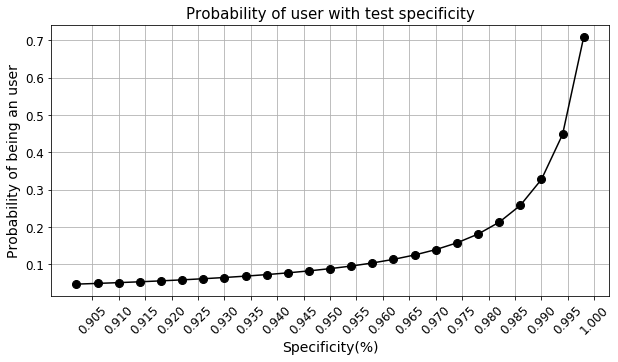

In [6]:
ps = []
spes = []
for spe in [i*0.002+0.9 for i in range(1,50,2)]:
    spes.append(spe)
    p = drug_user(prob_th=0.5,sensitivity=0.97,specificity=spe,prevelance=0.005,verbose=False)
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of user with test specificity",fontsize=15)
plt.plot(spes,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Specificity(%)",fontsize=14)
plt.ylabel("Probability of being an user",fontsize=14)
plt.xticks([0.9+i*0.005 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

### Clearly, we should focus on the specificity of the test, not sensitivity

The plots above clearly shows that even with close to 100% sensitivity, we don't gain much at all. However, the probability response is highly non-linear with respect to the specificity of the test and as it reaches perfection, we get a large increase in the probability. Therefore, all R&D effort should be focused on how to improve the specificity of the test.

This conclusion can be intuitively derived from the fact that the main issue with having low probability is the low prevelance rate. Therefore, catching non-users correctly (i.e. improving specificity) is the area where we should focus on because they are much larger in numbers that the user.

Negative examples >> Positive examples in this problem. Therefore, True Negative performance of the test should be excellent.

### How about applying the Bayes' rule twice (or more)?

The best thing about Bayesian inference is the **ability to use prior knowledge** in the form of Prior probability term in the numerator of the Bayes' theorem.

In this setting of drug screening, the prior knowledge is nothing but the computed probability of a test which is then fed back to a next test.

That means, for these cases, where the prevelance rate in the general population is extremely low, one way to increase confidence is to prescribe subsequent test if the first test result is positive.

**The probability from the first test becomes the _Prior_ for the second test** i.e. the $P(\text{User})$ is not the general prevelance rate anymore for this second test, but the probability from the first test.

Let's see how the probability evolves with a series of tests...

In [7]:
p1 = drug_user(prob_th=0.5,sensitivity=0.97,specificity=0.95,prevelance=0.005)
print("Probability of the test-taker being a drug user, in the first round of test, is:",round(p1,3))
print()
p2 = drug_user(prob_th=0.5,sensitivity=0.97,specificity=0.95,prevelance=p1)
print("Probability of the test-taker being a drug user, in the second round of test, is:",round(p2,3))
print()
p3 = drug_user(prob_th=0.5,sensitivity=0.97,specificity=0.95,prevelance=p2)
print("Probability of the test-taker being a drug user, in the third round of test, is:",round(p3,3))

The test-taker may not be an user
Probability of the test-taker being a drug user, in the first round of test, is: 0.089

The test-taker could be an user
Probability of the test-taker being a drug user, in the second round of test, is: 0.654

The test-taker could be an user
Probability of the test-taker being a drug user, in the third round of test, is: 0.973


### Conclusion
With three consecutive tests, we are 97.3% confident about catching a true drug user, with the same test capabilities.

---

## Factory quality assesment example

The entire output of a factory is produced on three machines. The three machines account for 20%, 30%, and 50% of the factory output. The fraction of defective items produced is 5% for the first machine; 3% for the second machine; and 1% for the third machine. 

If an item is chosen at random from the total output and is found to be defective, what is the probability that it was produced by the third machine?

### Approach

Let $X_i$ denote the event that a randomly chosen item was made by the $i^{th}$ machine (for i = A,B,C). Let $Y$ denote the event that a randomly chosen item is defective. Then, we are given the following information:

$$P(X_A)=0.2, \ P(X_B)=0.3, \ P(X_C)=0.5 $$

From the defect run rate, we also have,

$$ P(Y|X_A)=0.05,\ P(Y|X_B)=0.03,\ P(Y|X_C)=0.01 $$

We need to compute $P(X_C|Y)$. Applying Bayes' rule,

$$ P(X_C|Y)=\frac{P(Y|X_C).P(X_C)}{P(Y)} $$

In this case, the main unknown in the denominator $P(Y)$, which can be calculated as follows,

$$ P(Y) = \sum_{i} P(Y|X_i).P(X_i) = (0.05)(0.2)+(0.03)(0.3)+(0.01)(0.5)=0.024 $$

So, $$ P(X_C|Y)= \frac{P(Y|X_C).P(X_C)}{P(Y)} \\ = \frac{(0.01)(0.5)}{0.024}\\ = 0.208 $$

### Insight

Given that the item is defective, the probability that it was made by the third machine is only 0.208. 

Although the machine C produces half of the total output, it produces a much smaller fraction of the defective items. Hence the knowledge that the item selected was defective enables us to **replace the prior probability $P(X_C)$ = 0.5 by the smaller posterior probability $P(X_C|Y)$ = 0.208**.

### Variability over time

A common scenario is that, the production capacity allocation and defect performance of the machines are not exactly constant and they vary over time. Factories continually monitor these numbers and may have to update the probability estimates using Bayes' rule as above.

We can write a simple script to add probabilistic variation to the Bayes' rule computation to demonstrate this.

In [8]:
def abs_array(array):
    return np.vectorize(np.abs)(array)

In [9]:
# Production capacity variability over 52 weeks in a year
p_XA = abs_array(0.2+np.random.normal(scale=0.05,size=52))
p_XB = abs_array(0.3+np.random.normal(scale=0.03,size=52))
p_XC = abs_array(0.5+np.random.normal(scale=0.07,size=52))

# Probability of defect variation over 52 weeks in a year
p_Y_XA = abs_array(0.05+np.random.normal(scale=0.01,size=52))
p_Y_XB = abs_array(0.03+np.random.normal(scale=0.015,size=52))
p_Y_XC = abs_array(0.01+np.random.normal(scale=0.004,size=52))

In [10]:
# Total probability: Denominator of Bayes' theorem
p_Y = p_Y_XA*p_XA+p_Y_XB*p_XB+p_Y_XC*p_XC

# Bayes' rule: Probability of item produced in machine A if it is found defective
p_XA_Y = (p_Y_XA*p_XA)/p_Y
# Bayes' rule: Probability of item produced in machine B if it is found defective
p_XB_Y = (p_Y_XB*p_XB)/p_Y
# Bayes' rule: Probability of item produced in machine C if it is found defective
p_XC_Y = (p_Y_XC*p_XC)/p_Y

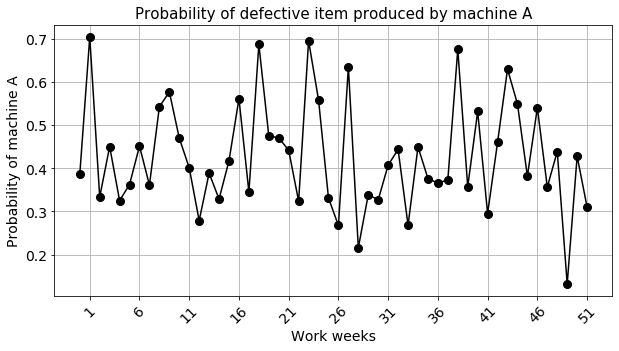

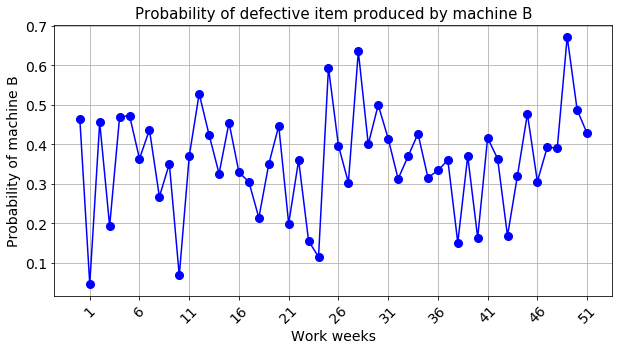

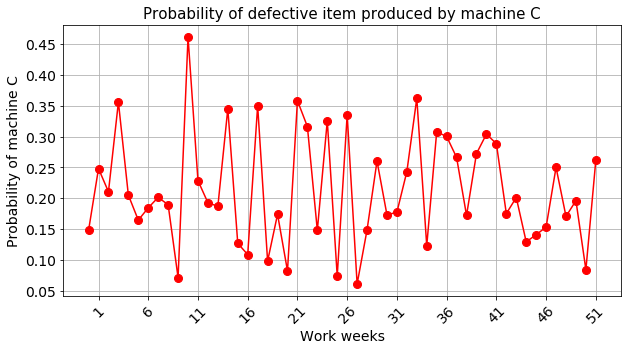

In [11]:
plt.figure(figsize=(10,5))
plt.title("Probability of defective item produced by machine A",fontsize=15)
plt.plot(p_XA_Y,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Work weeks",fontsize=14)
plt.ylabel("Probability of machine A",fontsize=14)
plt.xticks([i for i in range(1,53,5)],fontsize=14,rotation=45)
plt.yticks(fontsize=14)

plt.figure(figsize=(10,5))
plt.title("Probability of defective item produced by machine B",fontsize=15)
plt.plot(p_XB_Y,color='blue',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Work weeks",fontsize=14)
plt.ylabel("Probability of machine B",fontsize=14)
plt.xticks([i for i in range(1,53,5)],fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize=(10,5))
plt.title("Probability of defective item produced by machine C",fontsize=15)
plt.plot(p_XC_Y,color='red',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Work weeks",fontsize=14)
plt.ylabel("Probability of machine C",fontsize=14)
plt.xticks([i for i in range(1,53,5)],fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.show()

plt.show()